# HashCode 2020: PIZZA
#### PiscoSour

In [1]:
%matplotlib inline
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import copy
from random import shuffle

%load_ext nb_black

<IPython.core.display.Javascript object>

## Pizza functions

In [2]:
def read_input_file(file_name):
    """
    Reads the input file and returns m, n and sizes
    """
    with open(file_name, "r") as fin:
        line = fin.readline()
        m, n = [int(num) for num in line.split()]
        line = fin.readline().split()
        sizes = np.empty(n)
        for i in range(n):
            sizes[i] = int(line[i])
    return [m, n, sizes]


def write_file(output_file, pizzas_to_order):
    """
    write the output file for the passed pizza
    """
    with open(output_file, "w") as fout:
        # number of pizzas
        fout.write("%d\n" % len(pizzas_to_order))
        for s in pizzas_to_order:
            fout.write(str(s) + " ")
    print("file: " + output_file + " was saved")

<IPython.core.display.Javascript object>

## Read data

In [54]:
# Read the input file
input_path = "./input_data/"
# file_name = "a_example.in"
# file_name = "b_small.in"
# file_name = "c_medium.in"
# file_name = "d_quite_big.in"
file_name = "e_also_big.in"


[m, n, sizes] = read_input_file(input_path + file_name)
ids_of_pizzas = np.arange(n)
print("Maximum number of pizza slices to order:", m)
print("Number of dierent types of pizza:", n)

Maximum number of pizza slices to order: 505000000
Number of dierent types of pizza: 10000


<IPython.core.display.Javascript object>

# How's the data?

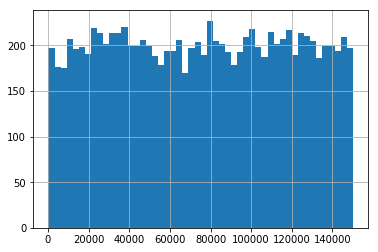

<IPython.core.display.Javascript object>

In [55]:
df_sizes = pd.DataFrame(columns=["nb_of_slices"], data=sizes)
df_sizes["nb_of_slices"].hist(bins=50)

# Trivial solution 1: add pizzas in order until limit is reached

In [56]:
nb_of_slices = 0
pizzas_to_order = []
total_slices = 0
for i in range(n):
    if total_slices + sizes[i] < m:
        pizzas_to_order.append(i)
        total_slices += sizes[i]
    else:
        print("limit reached")
        break
print("Total slices", total_slices)

limit reached
Total slices 504959667.0


<IPython.core.display.Javascript object>

In [57]:
m - total_slices

40333.0

<IPython.core.display.Javascript object>

In [7]:
output_file = "./results/output_" + file_name
write_file(output_file, pizzas_to_order)

file: ./results/output_d_quite_big.in was saved


<IPython.core.display.Javascript object>

# Trivial solution 2: sample pizzas wihtout replacement until limit is reached

In [58]:
nb_of_slices = 0
pizzas_to_order = []
total_slices = 0
np.random.shuffle(ids_of_pizzas)

for i in ids_of_pizzas:
    if total_slices + sizes[i] < m:
        pizzas_to_order.append(i)
        total_slices += sizes[i]
    else:
        print("limit reached")
        break
print("Total slices", total_slices)

limit reached
Total slices 504990287.0


<IPython.core.display.Javascript object>

In [59]:
m - total_slices

9713.0

<IPython.core.display.Javascript object>

In [9]:
output_file = "./results/output_" + file_name
write_file(output_file, pizzas_to_order)

file: ./results/output_d_quite_big.in was saved


<IPython.core.display.Javascript object>

# Improving function 1: look for available "small" pizzas

In [60]:
unassigned_pizzas = set(ids_of_pizzas).difference(set(pizzas_to_order))

df_unassigned = pd.DataFrame(
    columns=["id_pizza", "nb_of_slices"],
    data=list(zip(unassigned_pizzas, sizes[list(unassigned_pizzas)])),
)

df_unassigned.sort_values(by="nb_of_slices", inplace=True)
ids_unassigned = df_unassigned["id_pizza"].values

<IPython.core.display.Javascript object>

In [61]:
for i in ids_unassigned:
    if total_slices + sizes[i] < m:
        pizzas_to_order.append(i)
        total_slices += sizes[i]
    else:
        print("limit reached")
        break
print("Total slices", total_slices)

limit reached
Total slices 504999261.0


<IPython.core.display.Javascript object>

In [62]:
m - total_slices

739.0

<IPython.core.display.Javascript object>

In [63]:
output_file = "./results/output_" + file_name
write_file(output_file, pizzas_to_order)

file: ./results/output_e_also_big.in was saved


<IPython.core.display.Javascript object>